In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
# Download MBTA bus data if it hasn't been downloaded yet
from download_mbta_data import download_mbta_bus_data

download_mbta_bus_data()

data/MBTA_Bus_Arrival_Departure_Times_2024 folder already exists, skipping download and unzip
data/MBTA_Bus_Arrival_Departure_Times_2025 folder already exists, skipping download and unzip


In [19]:
from retrieve_weather_data import retrieve_weather_data

retrieve_weather_data()

2024 data already exists, skipping download


In [23]:
import pandas as pd
from glob import glob

mbta_files = glob("data/MBTA_Bus_Arrival_Departure_Times_2024/MBTA-Bus-Arrival-Departure-Times_2024*.csv")
mbta_data = pd.concat([pd.read_csv(f) for f in mbta_files], ignore_index=True)

mbta_data["route_id"].value_counts()

route_id
111    1294788
743     797474
28      770486
23      753176
SL1     738400
        ...   
192       5562
600       4410
171       4398
194       3216
rad         44
Name: count, Length: 153, dtype: int64

In [24]:
mbta_data.dropna(inplace=True)
mbta_data["route_id"].value_counts()

route_id
111    1170143
28      657199
23      640808
39      572285
66      562495
        ...   
240        416
24         374
95         368
04         322
08          17
Name: count, Length: 72, dtype: int64

In [114]:
filtered_mbta_data = mbta_data[["service_date","route_id", "scheduled" ,"actual"]]
filtered_mbta_data["service_date"] = pd.to_datetime(filtered_mbta_data["service_date"])
filtered_mbta_data["scheduled"] = pd.to_datetime(filtered_mbta_data["scheduled"])
filtered_mbta_data["actual"] = pd.to_datetime(filtered_mbta_data["actual"])


/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/1260497511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["service_date"] = pd.to_datetime(filtered_mbta_data["service_date"])
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/1260497511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["scheduled"] = pd.to_datetime(filtered_mbta_data["scheduled"])
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/1260497511.py:4: Sett

In [117]:
#!pip install holidays
import holidays

filtered_mbta_data["day_of_week"] = filtered_mbta_data["service_date"].dt.dayofweek  # Monday=0
filtered_mbta_data["is_weekend"] = filtered_mbta_data["day_of_week"].isin([5, 6]).astype(int)

us_holidays = holidays.US(years=[2024])
filtered_mbta_data["is_holiday"] = filtered_mbta_data["service_date"].dt.date.isin(us_holidays).astype(int)

print(len(filtered_mbta_data))
filtered_mbta_data.head()

/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2435066006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["day_of_week"] = filtered_mbta_data["service_date"].dt.dayofweek  # Monday=0
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2435066006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["is_weekend"] = filtered_mbta_data["day_of_week"].isin([5, 6]).astype(int)


10530554


/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2435066006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["is_holiday"] = filtered_mbta_data["service_date"].dt.date.isin(us_holidays).astype(int)


,service_date,route_id,scheduled,actual,day_of_week,is_weekend,is_holiday
7,2024-09-01,01,1900-01-01 11:25:00+00:00,1900-01-01 11:24:58+00:00,6,1,0
8,2024-09-01,01,1900-01-01 11:29:00+00:00,1900-01-01 11:27:02+00:00,6,1,0
11,2024-09-01,01,1900-01-01 11:32:00+00:00,1900-01-01 11:29:35+00:00,6,1,0
12,2024-09-01,01,1900-01-01 11:35:00+00:00,1900-01-01 11:33:28+00:00,6,1,0
13,2024-09-01,01,1900-01-01 11:39:00+00:00,1900-01-01 11:35:39+00:00,6,1,0


/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2565980952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["delay_minutes"] = (filtered_mbta_data["actual"] - filtered_mbta_data["scheduled"]).dt.total_seconds() / 60
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2565980952.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["label"] = filtered_mbta_data["delay_minutes"].apply(assing_labels)


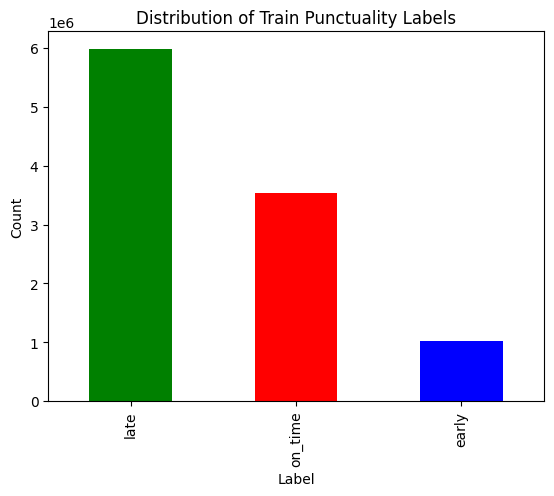

In [150]:
import matplotlib.pyplot as plt

# Calculate delay in minutes and assign labels
def assing_labels(delay):
    if delay < -2:
        return "early"
    elif -2 <= delay <= 2:
        return "on_time"
    else:
        return "late"

filtered_mbta_data["delay_minutes"] = (filtered_mbta_data["actual"] - filtered_mbta_data["scheduled"]).dt.total_seconds() / 60
filtered_mbta_data["label"] = filtered_mbta_data["delay_minutes"].apply(assing_labels)

filtered_mbta_data["label"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.title("Distribution of Train Punctuality Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [159]:
#Prepare weather data
weather_data = pd.read_csv("data/72509014739.csv")
weather_data["DATE"] = pd.to_datetime(weather_data["DATE"])
filtered_weather_data = weather_data[["DATE","WND","TMP","AA1","AA2","AA3"]]
def parse_precip(field):
    try:
        return float(field.split(",")[0]) / 10
    except:
        return 0.0
    
def parse_tmp_to_int(tmp):
    try:
        value = int(tmp.split(",")[0])
        return round(value / 10)
    except:
        return None  # handle missing or malformed values
    
def parse_wnd(wnd):
    try:
        parts = wnd.split(",")
        wind_dir_deg = int(parts[0])
        wind_speed_mps = round(int(parts[3]) / 10)
        return pd.Series({
            "wind_dir_deg": wind_dir_deg,
            "wind_speed_mps": wind_speed_mps
        })
    except:
        return pd.Series({
            "wind_dir_deg": None,
            "wind_speed_mps": None
        })
    
filtered_weather_data["precip_aa1"] = filtered_weather_data["AA1"].apply(parse_precip)
filtered_weather_data["precip_aa2"] = filtered_weather_data["AA2"].apply(parse_precip)
filtered_weather_data["precip_aa3"] = filtered_weather_data["AA3"].apply(parse_precip)
filtered_weather_data["TMP"] = filtered_weather_data["TMP"].apply(parse_tmp_to_int)
df_wind = filtered_weather_data["WND"].apply(parse_wnd)
filtered_weather_data = pd.concat([filtered_weather_data, df_wind], axis=1)

filtered_weather_data["precip_mm"] = filtered_weather_data[["precip_aa1", "precip_aa2", "precip_aa3"]].sum(axis=1)
filtered_weather_data = filtered_weather_data.drop(columns=["AA1","AA2","AA3"])
filtered_weather_data["is_rainy"] = (filtered_weather_data["precip_mm"] > 0).astype(int)

filtered_weather_data = filtered_weather_data[filtered_weather_data["TMP"] < 45]
filtered_weather_data = filtered_weather_data[filtered_weather_data["wind_speed_mps"] < 999]

filtered_weather_data.head()




/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2002030834.py:2: DtypeWarning: Columns (34,42,43,47,52,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv("data/72509014739.csv")
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2002030834.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather_data["precip_aa1"] = filtered_weather_data["AA1"].apply(parse_precip)
/var/folders/3r/88snk92d11b587958zlh76b80000gn/T/ipykernel_41221/2002030834.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,DATE,WND,TMP,precip_aa1,precip_aa2,precip_aa3,wind_dir_deg,wind_speed_mps,precip_mm,is_rainy
0,2024-01-01 00:00:00,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
1,2024-01-01 00:54:00,"350,5,N,0046,5",1,0.1,0.0,0.0,350,5,0.1,1
2,2024-01-01 01:54:00,"340,5,N,0036,5",1,0.1,0.0,0.0,340,4,0.1,1
3,2024-01-01 02:54:00,"340,5,N,0036,5",1,0.1,0.0,0.0,340,4,0.1,1
4,2024-01-01 03:00:00,"340,1,N,0036,1",1,0.0,0.0,0.0,340,4,0.0,0


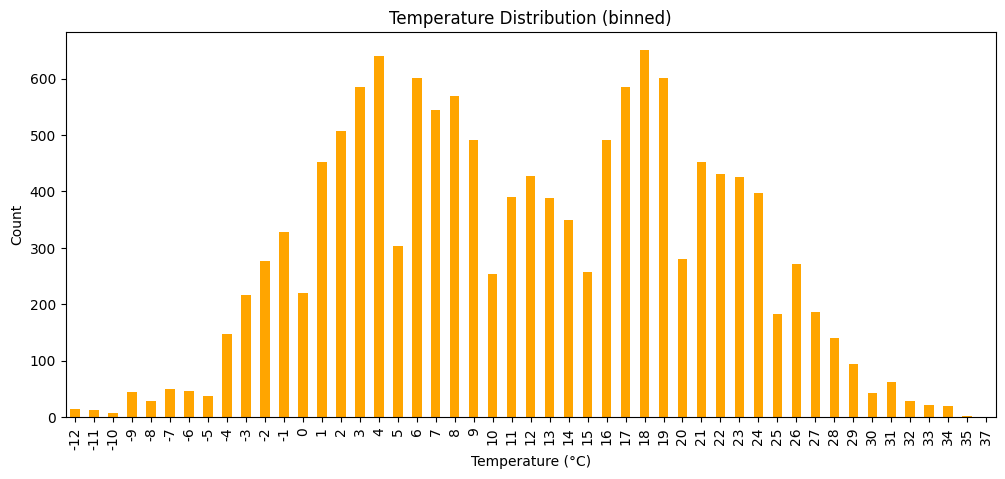

In [160]:
# Count per bin
temp_counts = filtered_weather_data["TMP"].value_counts().sort_index()

# Plot
temp_counts.plot(kind="bar", color="orange", figsize=(12,5))
plt.title("Temperature Distribution (binned)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


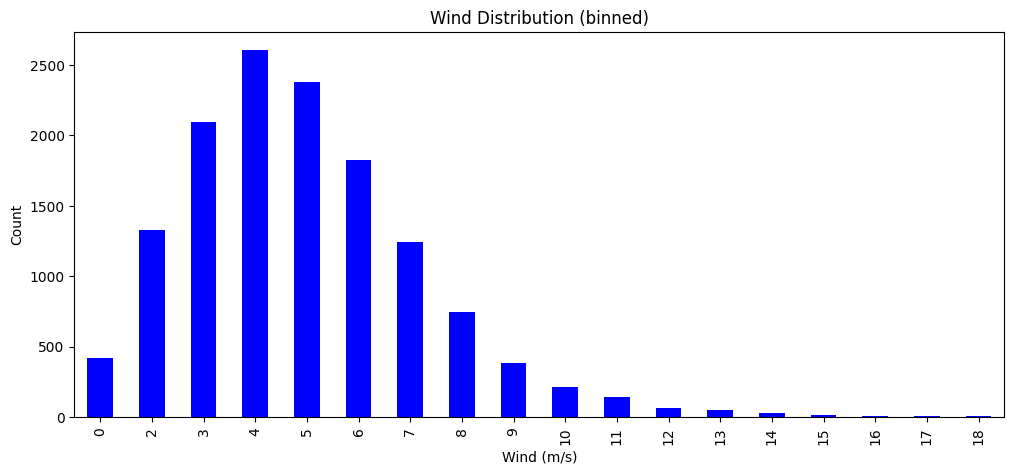

In [161]:
# Count per bin
wind_counts = filtered_weather_data["wind_speed_mps"].value_counts().sort_index()

# Plot
wind_counts.plot(kind="bar", color="blue", figsize=(12,5))
plt.title("Wind Distribution (binned)")
plt.xlabel("Wind (m/s)")
plt.ylabel("Count")
plt.show()

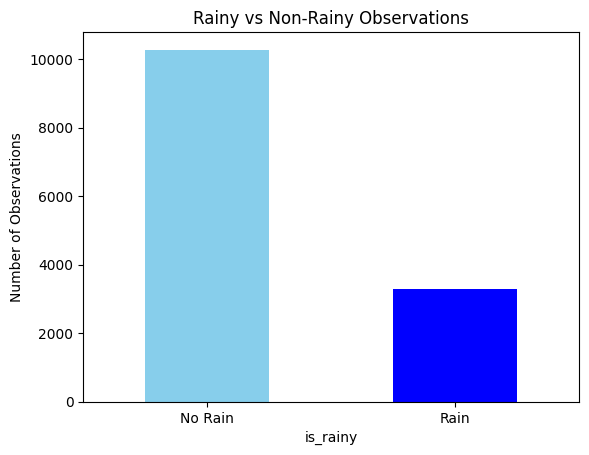

In [162]:
rain_counts = filtered_weather_data["is_rainy"].value_counts()

# Plot
rain_counts.plot(kind="bar", color=["skyblue", "blue"])
plt.xticks([0, 1], ["No Rain", "Rain"], rotation=0)
plt.ylabel("Number of Observations")
plt.title("Rainy vs Non-Rainy Observations")
plt.show()

In [163]:
# Merge based on closest timestamp
combined = pd.merge_asof(
    filtered_mbta_data.sort_values("service_date"),
    filtered_weather_data.sort_values("DATE"),
    left_on="service_date",
    right_on="DATE",
    direction="nearest",
    tolerance=pd.Timedelta("1h")
)

print(len(combined))

combined.dropna(inplace=True)
print(len(combined))
combined.head()

10530554
10530554


,service_date,route_id,scheduled,actual,day_of_week,is_weekend,is_holiday,delay_minutes,label,DATE,WND,TMP,precip_aa1,precip_aa2,precip_aa3,wind_dir_deg,wind_speed_mps,precip_mm,is_rainy
0,2024-01-01,SL4,1900-01-01 17:34:00+00:00,1900-01-01 17:39:39+00:00,0,0,1,5.650000,late,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
1,2024-01-01,66,1900-01-01 21:20:00+00:00,1900-01-01 21:19:51+00:00,0,0,1,-0.150000,on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
2,2024-01-01,66,1900-01-01 21:17:00+00:00,1900-01-01 21:21:49+00:00,0,0,1,4.816667,late,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
3,2024-01-01,66,1900-01-01 21:13:00+00:00,1900-01-01 21:17:16+00:00,0,0,1,4.266667,late,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
4,2024-01-01,66,1900-01-01 21:10:00+00:00,1900-01-01 21:10:17+00:00,0,0,1,0.283333,on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0


In [169]:
# Train random forest model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
combined["label_encoded"] = label_encoder.fit_transform(combined["label"])
combined['route_encoded'] = LabelEncoder().fit_transform(combined['route_id'])

features = [
    "route_encoded", "day_of_week", "is_weekend", "is_holiday",
    "TMP", "is_rainy", "wind_speed_mps", "wind_dir_deg"
]

X = combined[features]
y = combined["label_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    class_weight="balanced",
    random_state=42,
    verbose=2
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.7s finished


              precision    recall  f1-score   support

       early       0.22      0.55      0.31    204109
        late       0.72      0.60      0.65   1196397
     on_time       0.44      0.36      0.40    705605

    accuracy                           0.52   2106111
   macro avg       0.46      0.51      0.45   2106111
weighted avg       0.58      0.52      0.54   2106111

